In [11]:
import pandas as pd
events = pd.read_csv('events.csv')

## Check the length of text

When 

In [4]:
events.sample(5)

,title,details,type,type_id,host,date,time,location,link,title_details
4404,TeaGather with CommuniTEA,"In partnership with Duke CommuniTEA, this well...",Health/Wellness,1,Student Wellness Center,"Thu, Mar 23, 2023",5 PM – 6 PM EDT (GMT-4),Private Location (sign in to display),https://dukegroups.com/events/rsvp?id=1936769,TeaGather with CommuniTEA. In partnership with...
1033,Concussion (2015) Virtual Screening!,Join us on Thursday at 9pm for a virtual scree...,Social,2,DUU Freewater Presentations,"Thu, Feb 11, 2021",9 PM – 11:30 PM EST (GMT-5),-,https://dukegroups.com/events/rsvp?id=1001804,Concussion (2015) Virtual Screening!. Join us ...
3643,Recovery Group Meeting,Struggling with addiction? Seeking support for...,Health/Wellness,1,Student Wellness Center,"Fri, Dec 3, 2021",4 PM – 5 PM EST (GMT-5),Private Location (sign in to display),https://dukegroups.com/events/rsvp?id=1170068,Recovery Group Meeting. Struggling with addict...
1951,Annual Exhibit Opening Reception,To mark the opening of the annual Art of a Sci...,Social,2,Art of a Scientist,"Sat, Jul 15, 2023",6 PM – 8 PM EDT (GMT-4),Private Location (sign in to display),https://dukegroups.com/events/rsvp?id=2126080,Annual Exhibit Opening Reception. To mark the ...
262,Ciceronian Society hosts Dr. Peter Arcidiacono,In place of our traditional general body meeti...,Lecture/Talk,4,The Ciceronian Society,"Thu, Feb 17, 2022",6:30 PM – 8 PM EST (GMT-5),Private Location (sign in to display),https://dukegroups.com/events/rsvp?id=1499566,Ciceronian Society hosts Dr. Peter Arcidiacono...


In [5]:
events['title'].str.len().describe()

count    5846.000000
mean       32.808074
std        16.972864
min         4.000000
25%        21.000000
50%        30.000000
75%        41.000000
max       180.000000
Name: title, dtype: float64

In [6]:
events['details'].str.len().describe()

count    5839.000000
mean      304.315636
std       256.655405
min         4.000000
25%       112.000000
50%       253.000000
75%       423.000000
max      3944.000000
Name: details, dtype: float64

In [7]:
events['title_details'].str.len().describe()

count    5839.000000
mean      339.119541
std       262.512188
min        19.000000
25%       144.000000
50%       294.000000
75%       462.000000
max      4009.000000
Name: title_details, dtype: float64

In [8]:
# Sort by length of title_details in descending order
len_sorted = events.sort_values(by='title_details', key=lambda x: x.str.len(), ascending=False)
# Create a new column with the length of title_details
len_sorted['title_details_length'] = len_sorted['title_details'].str.len()
len_sorted.head(5)


,title,details,type,type_id,host,date,time,location,link,title_details,title_details_length
30,The Jews Are Coming: Biblical Satire and Moder...,"Throughout modern Israeli history, satire has ...",Lecture/Talk,4,Jewish Life at Duke,"Sun, Oct 25, 2020",1:30 PM – 3 PM EDT (GMT-4),Online Event,https://dukegroups.com/events/rsvp?id=868577,The Jews Are Coming: Biblical Satire and Moder...,4009.0
2995,PBS NC's Preview Screening of Facing Suicide a...,HYBRID EVENT //Two ways to join: online or in ...,Panel/Seminar/Colloquim,5,Duke Active Minds,"Wed, Aug 31, 2022",7 PM – 8:45 PM EDT (GMT-4),Private Location (sign in to display),https://dukegroups.com/events/rsvp?id=1698894,PBS NC's Preview Screening of Facing Suicide a...,2566.0
2791,Migration Policy in LAC,The number of migrants and refugees from Venez...,Panel/Seminar/Colloquim,5,Sanford Latin American and Caribbean Student G...,"Tue, Nov 9, 2021",6 PM – 8 PM EST (GMT-5),Rhodes Conference Room,https://dukegroups.com/events/rsvp?id=1353685,Migration Policy in LAC. The number of migrant...,2548.0
26,Transforming the Vote feat. Cornell William Br...,Join DUU Speakers and Stage for 'Transforming ...,Lecture/Talk,4,DUU Speakers and Stage,"Mon, Nov 2, 2020",8 PM – 9 PM EST (GMT-5),Online Event,https://dukegroups.com/events/rsvp?id=871889,Transforming the Vote feat. Cornell William Br...,2515.0
5377,Job Search Group Advising for Master's Students,"Hello, Master's Students!You're welcome to joi...",Workshop/Short Course,3,Career Center,"Tue, Feb 8, 2022",3:30 PM – 4:30 PM EST (GMT-5),Private Location (sign in to display),https://dukegroups.com/events/rsvp?id=1479932,Job Search Group Advising for Master's Student...,2048.0


In [16]:
from transformers import BertTokenizer

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


events['title_details'] = events['title_details'].astype(str)
events['token'] = events['title_details'].apply(lambda x: tokenizer.encode(x, max_length=512, truncation=True))



# # Your list of sentences
# sentences = [
#     "This is the first sentence.",
#     "Here's another example sentence.",
#     "A third sentence to tokenize."
# ]

# # Get the number of tokens for each sentence
# for sentence in sentences:
#     # Tokenize the sentence
#     tokens = tokenizer.encode(sentence, max_length=512, truncation=True)

#     # Print the original sentence and the number of tokens
#     print(f"Sentence: {sentence}")
#     print(f"Number of tokens: {len(tokens)}")
#     print()

In [17]:
events['token'].str.len().describe()

count    5846.000000
mean       73.593055
std        54.603185
min         3.000000
25%        32.000000
50%        63.000000
75%        97.000000
max       512.000000
Name: token, dtype: float64

<Axes: >

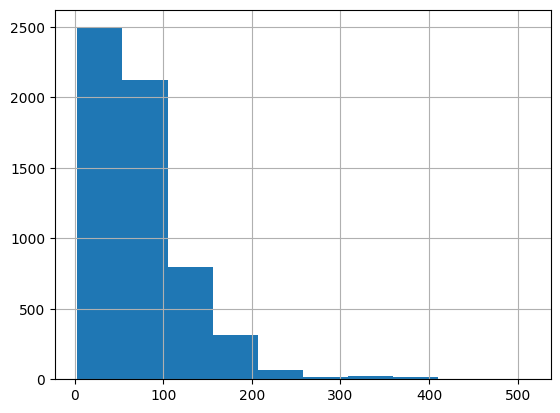

In [18]:
events['token'].str.len().hist()

## Checking the Capitalization of the Title and Details

In [19]:
import re

capitalized_words = events['details'].str.findall(r'(?<!\.\s)\b[A-Z][a-z]+\b')
capitalized_words = capitalized_words.explode().dropna()
numbers_count = capitalized_words.value_counts()
print(numbers_count)




details
Duke          3547
This          1306
Join          1147
Center        1055
Student        801
              ... 
Paypal           1
Jackpot          1
Even             1
Nowruz           1
Succulents       1
Name: count, Length: 4924, dtype: int64


In [20]:
events['type_id'].value_counts()

type_id
2    1931
1    1736
3     978
4     756
5     445
Name: count, dtype: int64

In [21]:
events['type_id'].describe()

count    5846.000000
mean        2.357338
std         1.240638
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: type_id, dtype: float64

In [22]:
events.shape

(5846, 11)

There is no missing labels